In [7]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,time,math

import torch
import pandas as pd

from scipy.signal import resample,correlate
from scipy import fftpack

import networkx as nx

import urllib
from bs4 import BeautifulSoup
from lmfit import Model

In [263]:
n_inputs = 5
n_outputs = 5

n_nodes = n_inputs+n_outputs

In [264]:
base_set = 2*(np.array([list(binstr) for binstr in [bin(k)[2:].zfill(n_nodes) for k in range(2**n_nodes)]]).astype(int)-0.5)

In [265]:
di = pd.DataFrame(columns=['X','Pr(X)'])
di['X'] = list(base_set)

di = di.sample(frac=1).reset_index(drop=True)

di.loc[:9,'Pr(X)'] = 1
di['Pr(X)'] = di['Pr(X)'].fillna(0)

di['Pr(X)'] = di['Pr(X)']/di['Pr(X)'].sum()

In [266]:
di

,X,Pr(X)
0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0,...",0.1
1,"[1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1...",0.1
2,"[1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1....",0.1
3,"[-1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, ...",0.1
4,"[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, ...",0.1
...,...,...
1019,"[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, ...",0.0
1020,"[-1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0,...",0.0
1021,"[1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1...",0.0
1022,"[-1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1...",0.0


In [301]:
xtrain = np.array([list(di.loc[k,'X']) for k in list(rnd.choice(di.index.tolist(),p=di['Pr(X)'].tolist(),size=1000))])
xtest = np.array([list(di.loc[k,'X']) for k in list(rnd.choice(di.index.tolist(),p=di['Pr(X)'].tolist(),size=100))])

In [302]:
W = np.zeros(shape=[xtrain.shape[1],xtrain.shape[1]])
N = xtrain.shape[0]

for i in range(xtrain.shape[1]):
    for j in range(i,xtrain.shape[1]):
        if i==j:
            W[i,j] = 0
            continue
        corr = 0
        for x in range(xtrain.shape[0]):
            corr += (xtrain[x,i]*xtrain[x,j])
        corr /= N
        W[i,j] = corr
        W[j,i] = corr

C:\Users\Jan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


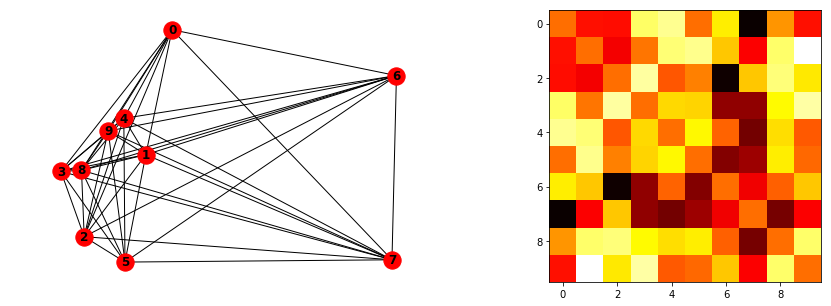

In [303]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

G = nx.from_numpy_array(W)

nx.draw(G, with_labels=True, font_weight='bold',ax=ax[0])
ax[1].imshow(W,cmap='hot',interpolation='nearest')

plt.show()

In [304]:
xtest_in = xtest[:,:n_inputs]
xtest_out = xtest[:,n_outputs:]

updatable = list(np.arange(xc_i.shape[0],n_nodes))

for ctr in range(xtest.shape[0]):
    
    xc_i = xtest_in[ctr]
    xc_o = xtest_out[ctr]

    s = np.concatenate([xc_i,rnd.randn(xc_o.shape[0])])
    sp = np.concatenate([xc_i,xc_o])
    for node in updatable:
        act = 0
        for n in range(W.shape[0]):
            act += W[node,n]*s[n]
        if act>=0:
            s[node] = 1
        else:
            s[node] = -1

    print(np.sign(np.abs(s-sp)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
[0. 0. 0

In [299]:
xtest.shape

(25, 10)

In [289]:
sp

array([ 1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.])

In [278]:
di[(di['Pr(X)']!=0)&(di['X'].apply(lambda x: (x[:5]-s[:5]).sum()==0))]['X'].apply(lambda x: x[-5:])

3     [1.0, 1.0, -1.0, 1.0, 1.0]
4    [-1.0, 1.0, 1.0, -1.0, 1.0]
Name: X, dtype: object